In [1]:
#import packages
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
data = pd.read_csv('../data/qbs.csv')

#drop rows where season = 2024
data = data[data['season'] != 2024]

data.head()




,transfer,season,player_playerId,player_firstName,player_lastName,player_position,player_teamId,player_teamName,player_height,player_weight,...,stats_passing_interceptions,stats_passing_pct,stats_rushing_ypc,stats_rushing_touchdowns,stats_rushing_carries,stats_rushing_yards,stats_rushing_long,stats_fumbles_fumbles,stats_fumbles_recovered,stats_fumbles_lost
0,0,2021,4875287,A.J.,Abbott,QB,2483,Oregon,74.0,233.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,2016,-1039931,A.J.,Cecil,QB,254,Utah,73.0,195.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,2017,545682,A.J.,Erdely,QB,5,UAB,76.0,220.0,...,4.0,0.607,0.0,13.0,122.0,320.0,41.0,6.0,0.0,2.0
3,0,2018,545682,A.J.,Erdely,QB,5,UAB,76.0,220.0,...,7.0,0.563,0.0,5.0,84.0,257.0,38.0,2.0,0.0,0.0
4,0,2019,4429716,A.J.,Gucciardo,QB,2649,Toledo,73.0,185.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


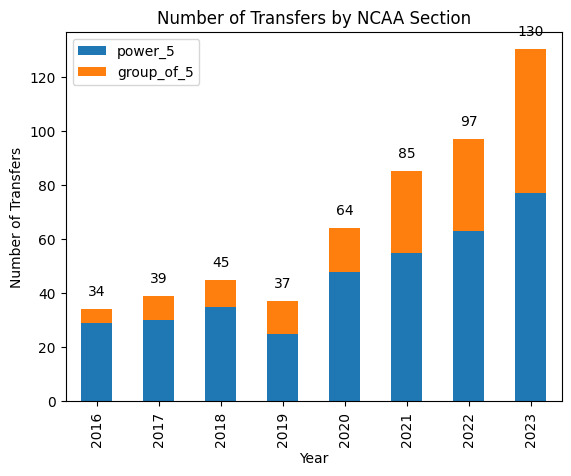

In [3]:
# Visuzalize the difference between power 5 and group of 5 schools

# break down by power 5 vs group of 5
power_5 = ['SEC', 'ACC', 'Big 12', 'Big Ten', 'Pac-12']

# create boolean mask for power 5 conferences
power_5_mask = data['team_conference'].isin(power_5)

# filter data using the mask
power_5_transfers = data[power_5_mask]
group_of_5_transfers = data[~power_5_mask]

# limit to transfers
power_5_transfers = power_5_transfers[power_5_transfers['transfer'] == 1]
group_of_5_transfers = group_of_5_transfers[group_of_5_transfers['transfer'] == 1]

transfer_stats = {}

# between 2016 and 2023, get the number of transfers for each ncaa section and add to dictionary
for year in range(2016, 2024):
    power_5_transfers_year = power_5_transfers[power_5_transfers['season'] == year]
    group_of_5_transfers_year = group_of_5_transfers[group_of_5_transfers['season'] == year]
    transfer_stats[year] = {
        'power_5': len(power_5_transfers_year),
        'group_of_5': len(group_of_5_transfers_year)
    }

# create a dataframe from the dictionary
transfer_stats_df = pd.DataFrame(transfer_stats).T

# plot the data
ax = transfer_stats_df.plot(kind='bar', stacked=True)
plt.title('Number of Transfers by NCAA Section')
plt.xlabel('Year')
plt.ylabel('Number of Transfers')

# calculate and annotate the total number of transfers for each year
totals = transfer_stats_df.sum(axis=1)
for i, total in enumerate(totals):
    ax.text(i, total + 5, str(total), ha='center')

plt.show()

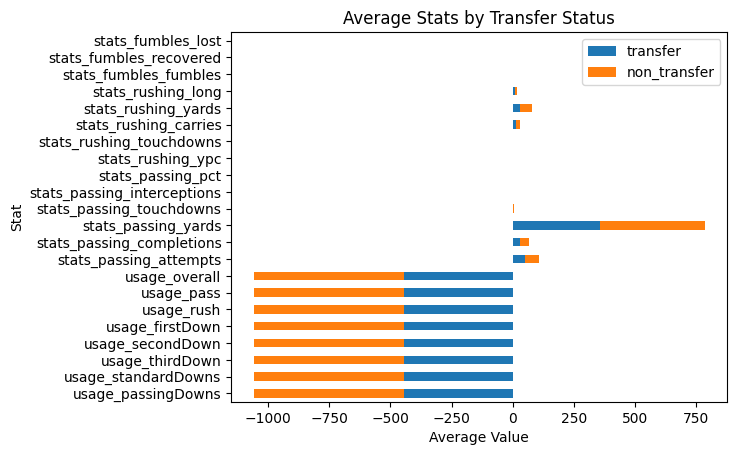

In [4]:
#foreach column with usage_ or stats_ in the name, get a dataframe of the average value for transfers vs non-transfers to compare
transfer_stats = {}
for column in data.columns:
    if 'usage_' in column or 'stats_' in column:
        transfer_stats[column] = {
            'transfer': data[data['transfer'] == 1][column].mean(),
            'non_transfer': data[data['transfer'] == 0][column].mean()
        }

# create a dataframe from the dictionary
transfer_stats_df = pd.DataFrame(transfer_stats).T

# plot the data
ax = transfer_stats_df.plot(kind='barh', stacked=True)

plt.title('Average Stats by Transfer Status')
plt.ylabel('Stat')
plt.xlabel('Average Value')

plt.show()

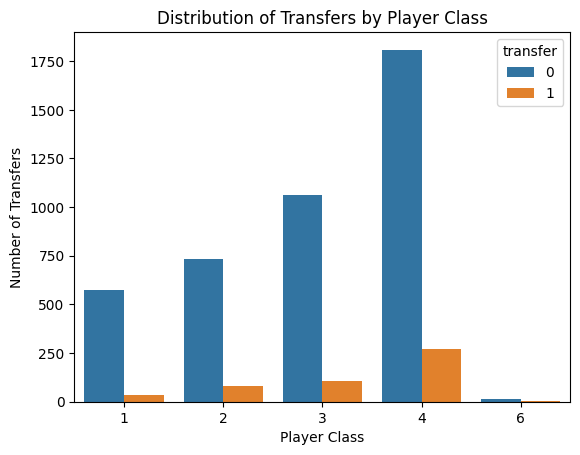

In [5]:
class_data = data.copy()

#limit class data to where player_class is less than 10
class_data = class_data[class_data['player_class'] < 10]

#plot the distribution of transfers based on player_class
sns.countplot(data=class_data, x='player_class', hue='transfer')
plt.title('Distribution of Transfers by Player Class')
plt.xlabel('Player Class')
plt.ylabel('Number of Transfers')
plt.show()

#### Distribution of transfers class ^^
Certainly need to keep this in mind. Maybe we can implement something like a risk factor.
You can see that each year the player goes up they have a higher risk factor

In [6]:
#get transfer factor for each year.

def calculate_risk_factor(data, player_class):
    transfers = data[(data['player_class'] == player_class) & (data['transfer'] == 1)]['transfer'].count()
    non_transfers = data[(data['player_class'] == player_class) & (data['transfer'] == 0)]['transfer'].count()
    total_players = transfers + non_transfers
    risk_factor = transfers / total_players if total_players > 0 else 0
    return risk_factor, transfers, non_transfers, total_players

player_classes = [1, 2, 3, 4, 6]  # Include all player classes from the graph
results = {}

for pc in player_classes:
    risk_factor, transfers, non_transfers, total_players = calculate_risk_factor(data, pc)
    results[pc] = {
        'risk_factor': risk_factor,
        'transfers': transfers,
        'non_transfers': non_transfers,
        'total_players': total_players
    }


for pc, stats in results.items():
    print(f"Player Class {pc}:")
    print(f"  Total Players: {stats['total_players']}")
    print(f"  Transfers: {stats['transfers']}")
    print(f"  Non-Transfers: {stats['non_transfers']}")
    print(f"  Risk Factor: {stats['risk_factor']:.4f}")
    print()




Player Class 1:
  Total Players: 609
  Transfers: 33
  Non-Transfers: 576
  Risk Factor: 0.0542

Player Class 2:
  Total Players: 815
  Transfers: 82
  Non-Transfers: 733
  Risk Factor: 0.1006

Player Class 3:
  Total Players: 1170
  Transfers: 109
  Non-Transfers: 1061
  Risk Factor: 0.0932

Player Class 4:
  Total Players: 2081
  Transfers: 272
  Non-Transfers: 1809
  Risk Factor: 0.1307

Player Class 6:
  Total Players: 16
  Transfers: 2
  Non-Transfers: 14
  Risk Factor: 0.1250

